In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from data_handler import testloader
from model import ConvNet


In [6]:
# load model
model_state = torch.load('model.pth')
model = ConvNet()
model.load_state_dict(model_state)

<All keys matched successfully>

In [7]:
# To visualize predictions
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap = 'Greys_r')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

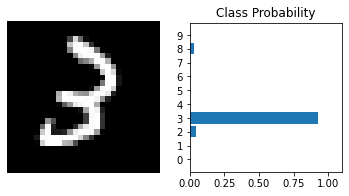

In [20]:
images, labels = next(iter(testloader))

model.eval()
for img in images:
    clear_output(wait=True)
    with torch.no_grad():
        log_soft = model(img.reshape(1, *img.shape))
    ps = torch.exp(log_soft)
    view_classify(img, ps)
    plt.show()
    time.sleep(3)